# Visualize extracted features by VGG16

In [2]:
import numpy as np
import tensorflow as tf
import time
import numpy as np

from PIL import Image as pil_image
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras import layers
from tensorflow.keras.applications import vgg16
from tensorflow.keras import backend as K
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1' if you want to run on CPU

Here, we use a script written by Jason Brownlee that allows us to visualize the features extracted by VGG16 pre trained
CNN. We test it with one image in our dataset but it can be generalized.
The code is pretty fast to run on 1 image.
-----------------
Further information on his article : https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

# Script for the visualization of filters (if needed)

In [3]:
tf.compat.v1.disable_eager_execution()

# Script for the visualization of features

## Visualization of trainable layers in VGG16

In [4]:
# summarize feature map size for each conv layer
from tensorflow.keras.applications.vgg16 import VGG16
from matplotlib import pyplot as plt

# load the model
model = VGG16()

# summarize feature map shapes
for i in range(len(model.layers)):

    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


## Image used in this exemple (size 51x51)

In [5]:
!ls ../../cosmos_data_pad/

BlendHunterData  blended.npy  not_blended.npy


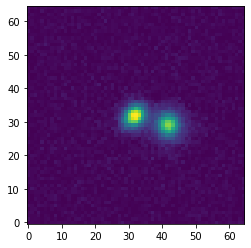

In [6]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
image_to_read = mpimg.imread('../../cosmos_data_pad/BlendHunterData/test/test/image_20103.png') 
  
# Output Image 
plt.imshow(image_to_read, origin='lower') 

## Visualization of features extracted on one image by the 1st layer

In [7]:
image_location = '../../cosmos_data_pad/BlendHunterData/test/test/image_20103.png'

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [9]:
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [10]:
# load the image with the required shape
img = load_img(image_location, target_size=(224, 224))

In [11]:
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

In [12]:
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

In [13]:
# get feature map for first hidden layer
feature_maps = model.predict(img)


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


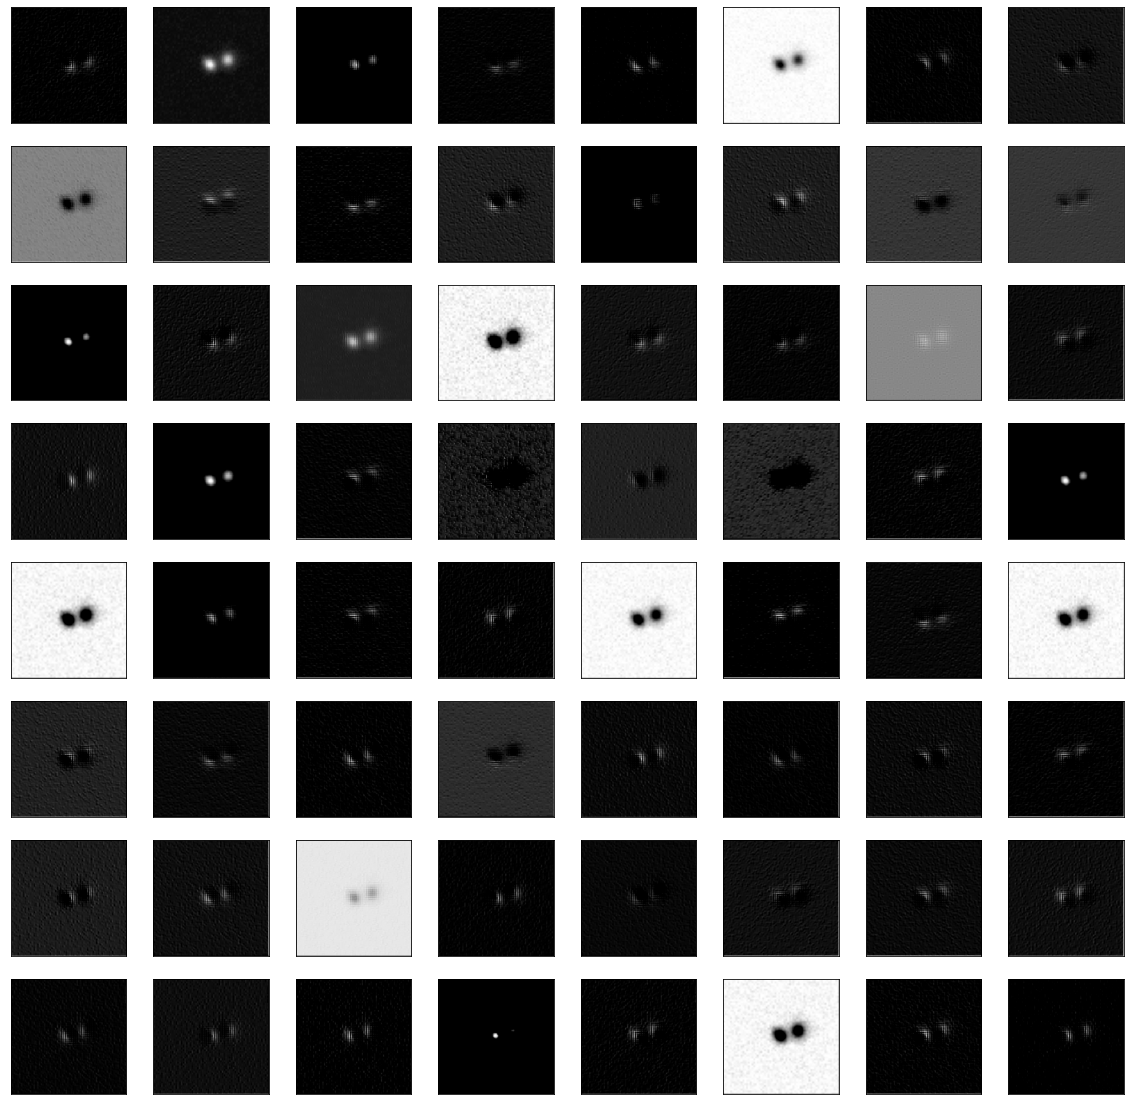

In [14]:
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
fig=pyplot.figure(figsize=((20,20)))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.savefig('all_64_maps.png',bbox_inches='tight')

### Visualize feature maps output from each block in VGG16 

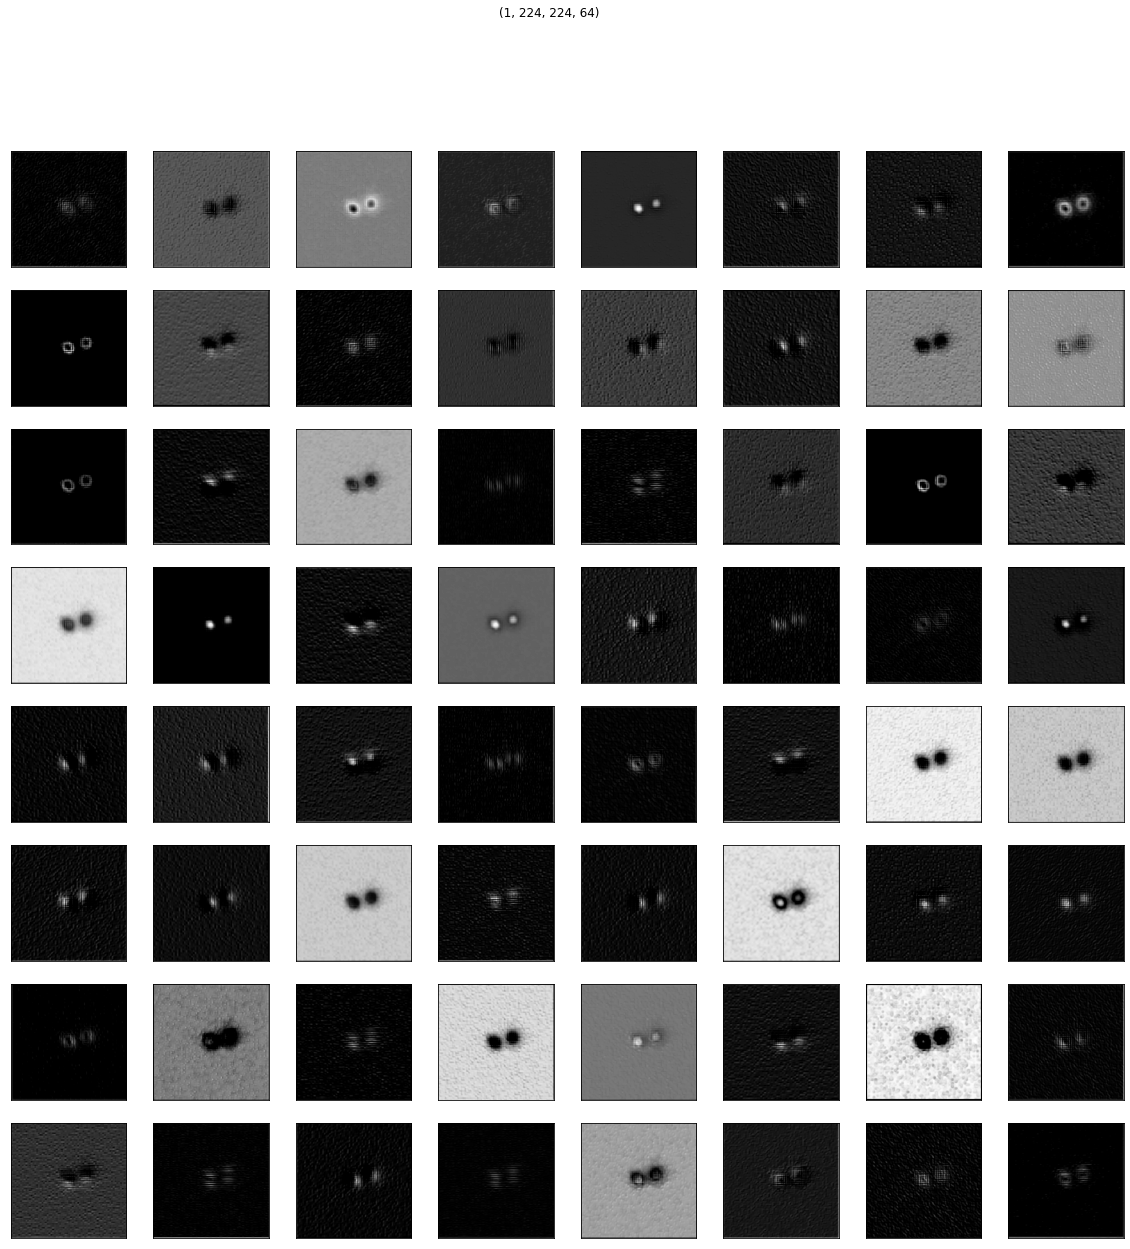

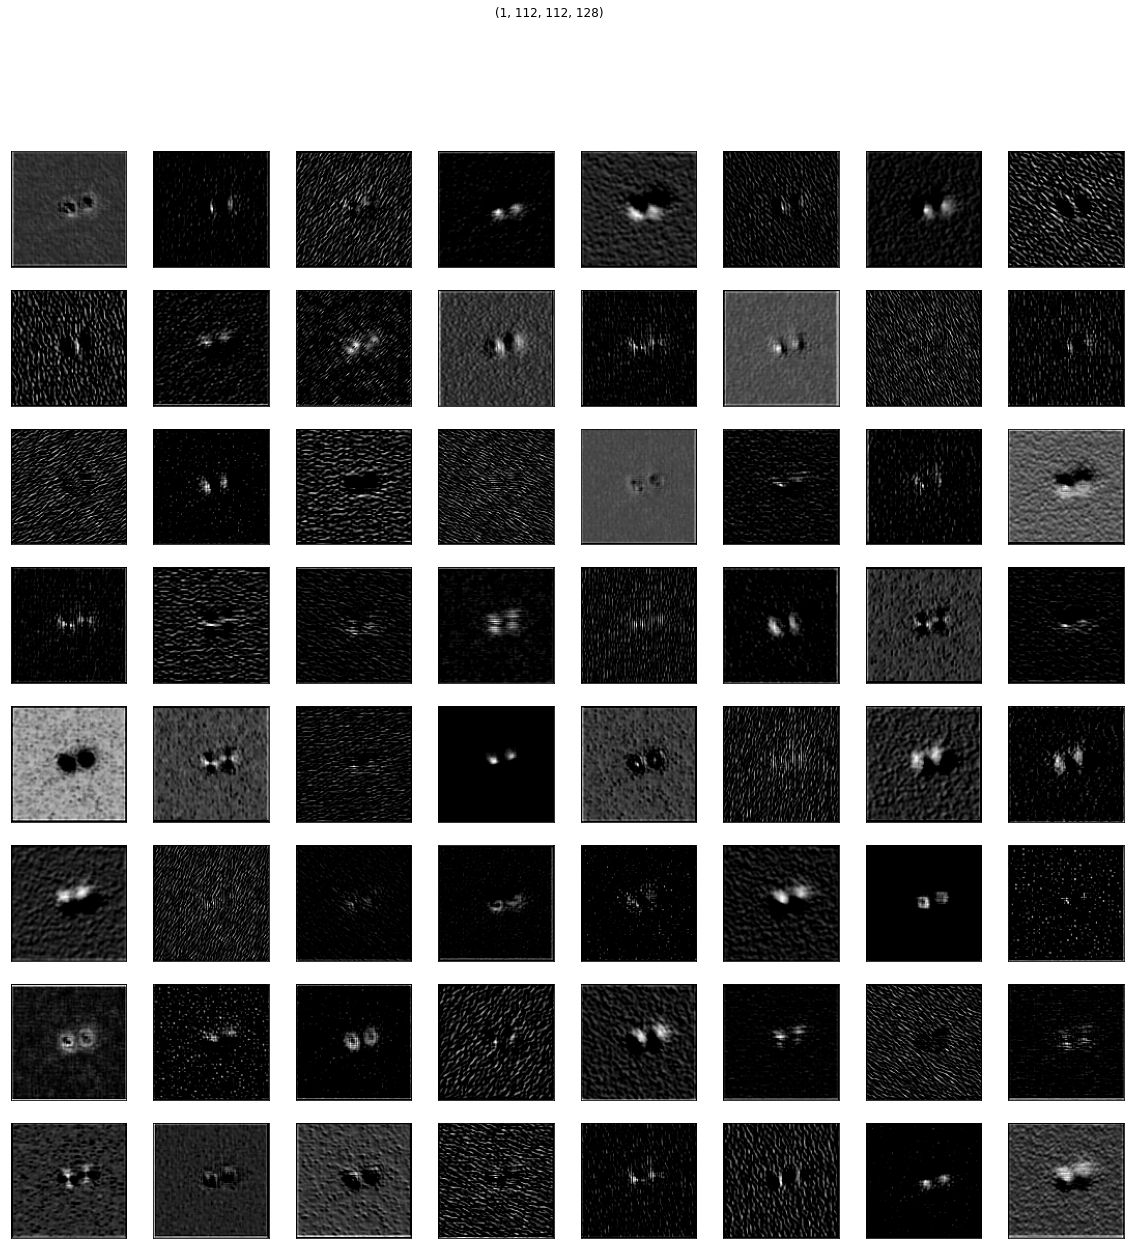

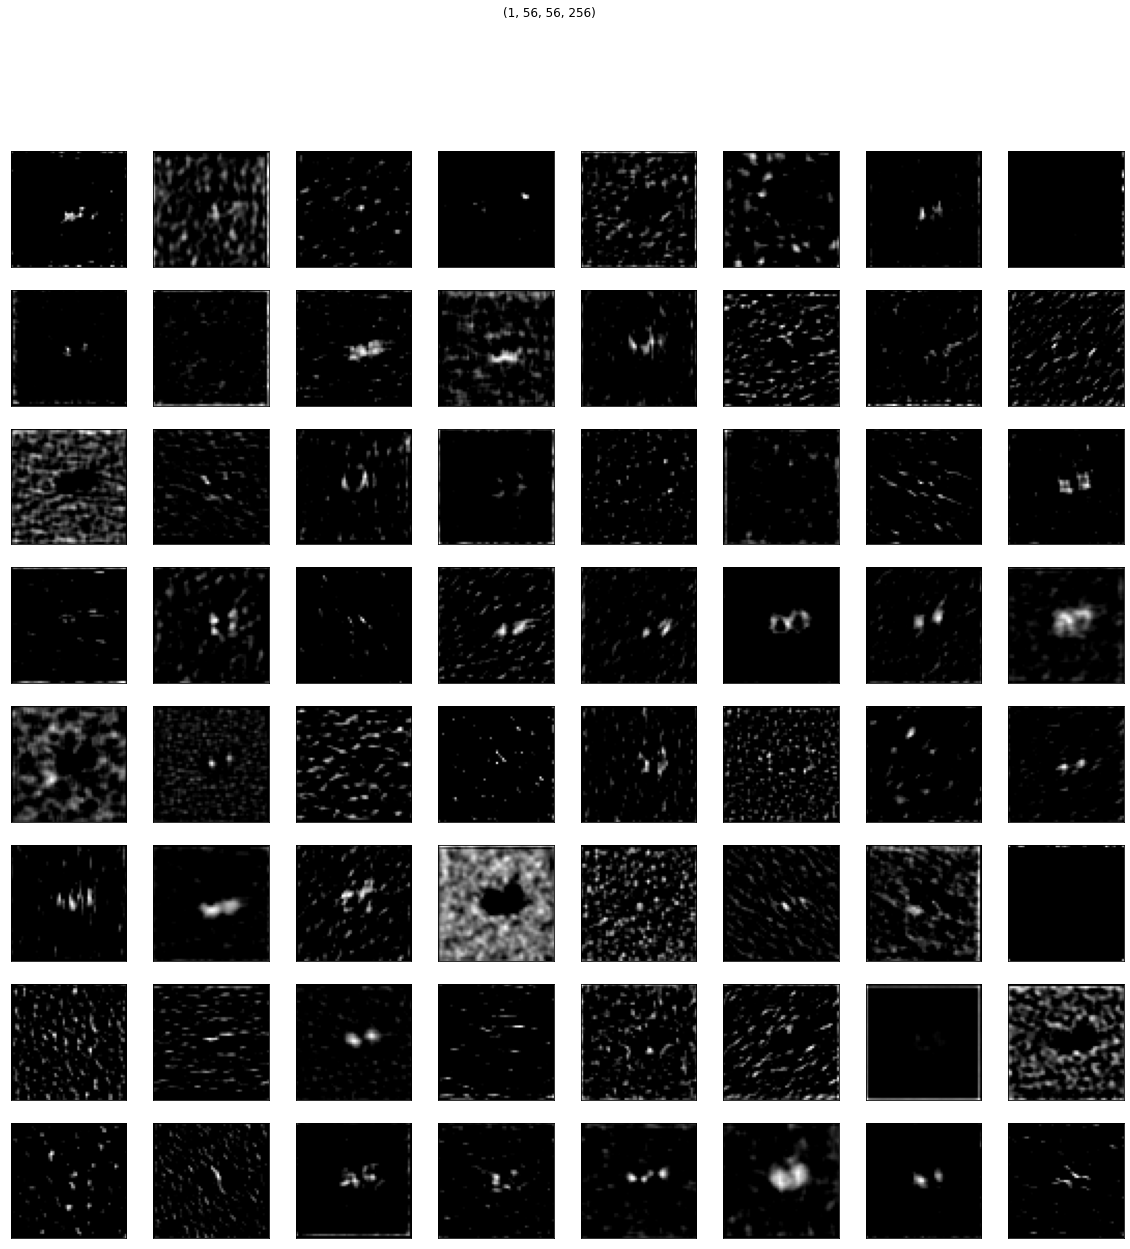

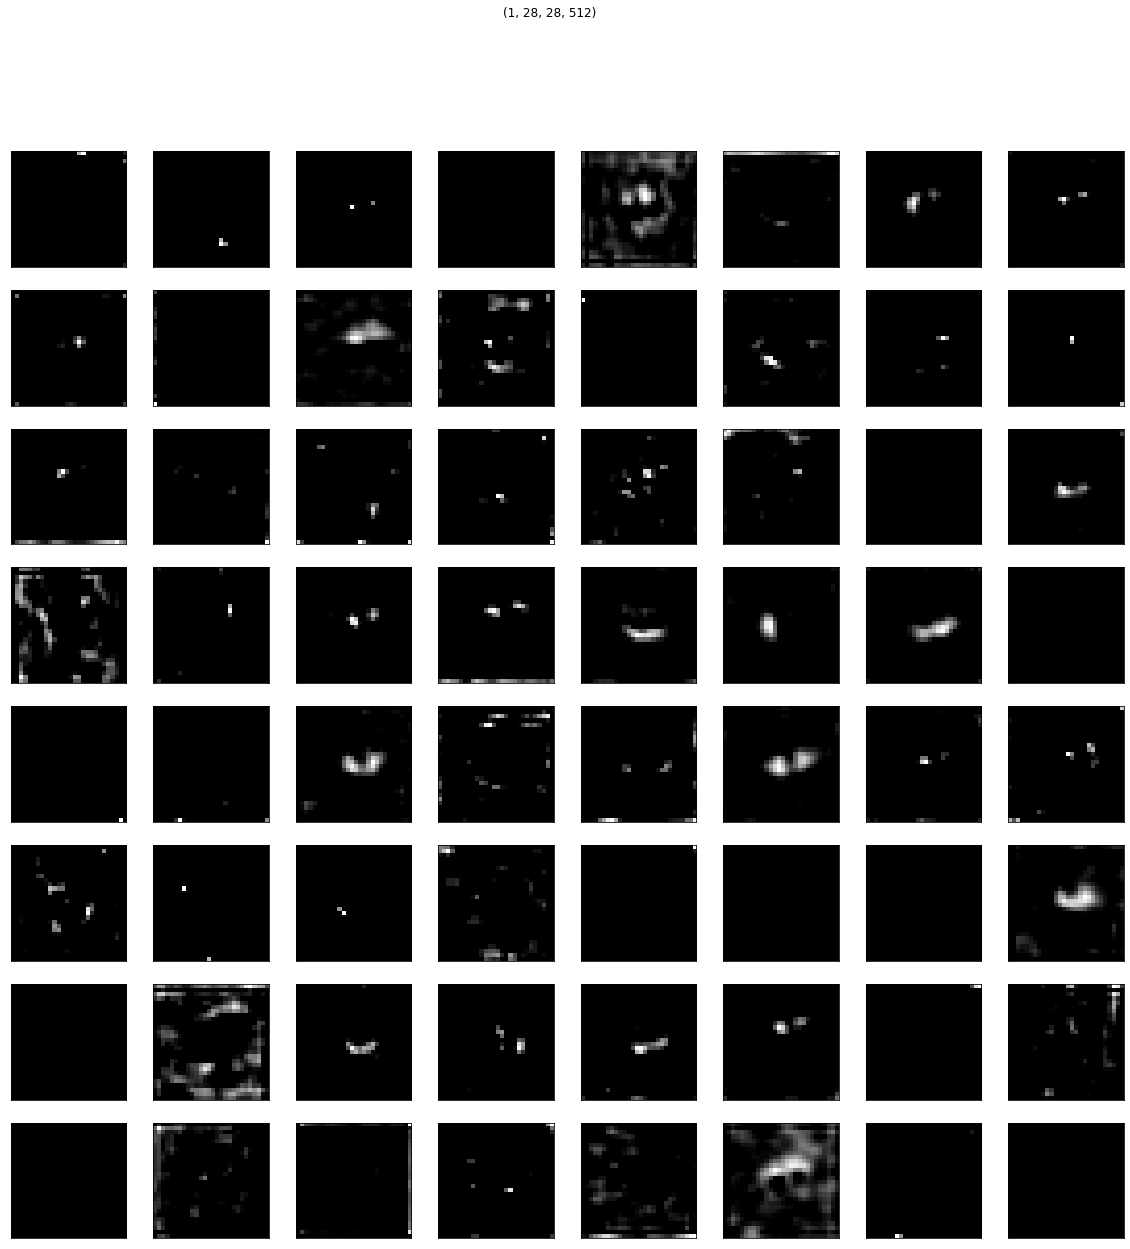

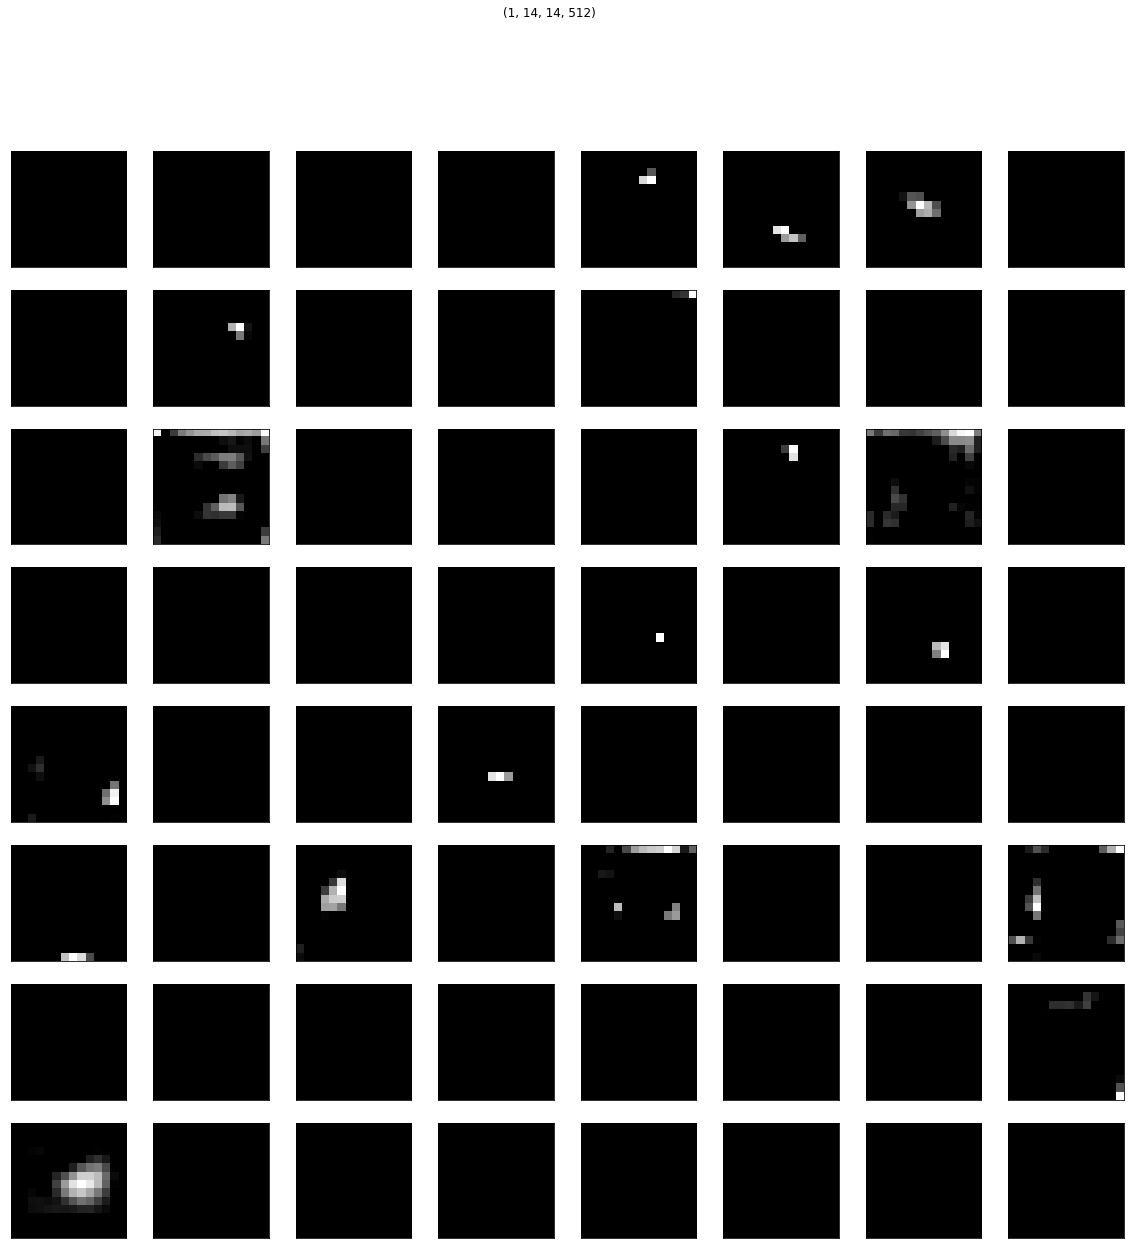

In [15]:

# load the model
model = VGG16()

# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# load the image with the required shape
img = load_img(image_location, target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot the output from each block
square = 8
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    fig=pyplot.figure(figsize=((20,20)))
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = fig.add_subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            ax.imshow(fmap[0, :, :, ix-1], cmap='gray')
            
            ix += 1
            # show the figure
    fig.suptitle(fmap.shape)
pyplot.savefig('feature_map_each_blog.png',bbox_inches='tight')


In [19]:
for fmap in feature_maps:
    print(fmap.shape)

(1, 224, 224, 64)
(1, 112, 112, 128)
(1, 56, 56, 256)
(1, 28, 28, 512)
(1, 14, 14, 512)


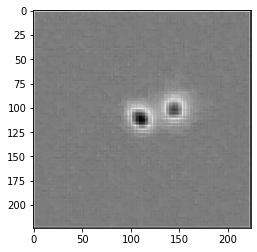

In [36]:
plt.imshow(feature_maps[0][0,:,:,2],cmap='gray')

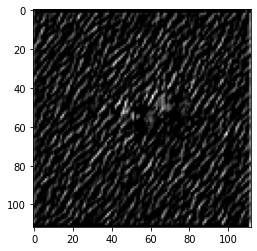

In [37]:
plt.imshow(feature_maps[1][0,:,:,2],cmap='gray')

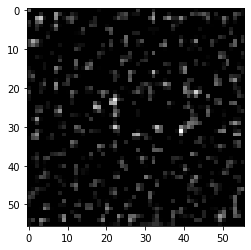

In [73]:
plt.imshow(feature_maps[2][0,:,:,37],cmap='gray')

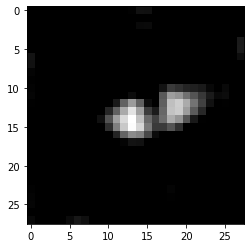

In [74]:
plt.imshow(feature_maps[3][0,:,:,37],cmap='gray')

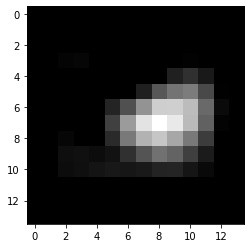

In [72]:
plt.imshow(feature_maps[4][0,:,:,56],cmap='gray')

In [94]:
imgs = [image_to_read,feature_maps[0][0,:,:,2],feature_maps[1][0,:,:,2],feature_maps[2][0,:,:,37],feature_maps[3][0,:,:,37],feature_maps[4][0,:,:,56]]
img_labels = [f'Image ({img.shape[0]}x{img.shape[1]})',
              f'Block 1 ({img.shape[0]}x{img.shape[1]})',
              f'Block 2 ({img.shape[0]}x{img.shape[1]})',
              f'Block 3 ({img.shape[0]}x{img.shape[1]})',
              f'Block 4 ({img.shape[0]}x{img.shape[1]})', 
              f'Block 5 ({img.shape[0]}x{img.shape[1]})' ]

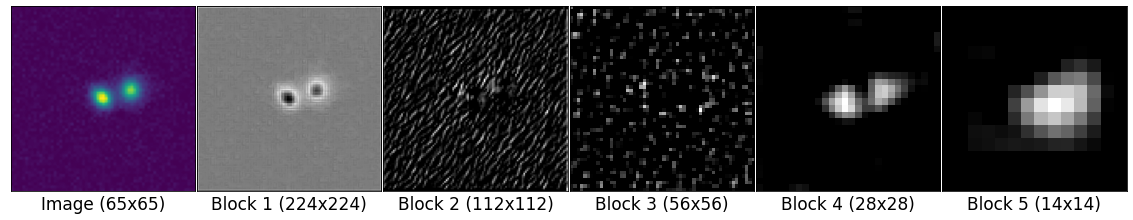

In [106]:
plt.figure(figsize=(20,20))
img_labels = [f'Image ({imgs[0].shape[0]}x{imgs[0].shape[1]})',
              f'Block 1 ({imgs[1].shape[0]}x{imgs[1].shape[1]})',
              f'Block 2 ({imgs[2].shape[0]}x{imgs[2].shape[1]})',
              f'Block 3 ({imgs[3].shape[0]}x{imgs[3].shape[1]})',
              f'Block 4 ({imgs[4].shape[0]}x{imgs[4].shape[1]})', 
              f'Block 5 ({imgs[5].shape[0]}x{imgs[5].shape[1]})' ]




for i, img in enumerate(imgs):
    plot = pyplot.subplot(1, 6,i+1)
    if i> 0:
        plot.imshow(img,cmap='gray')
    else:
        plot.imshow(img)
    plot.set_xticks([])
    plot.set_yticks([])
    plot.set_xlabel(img_labels[i],fontsize=17)
    #
plt.subplots_adjust(wspace=.01, hspace=0)
plt.savefig('VGG_processing.pdf',bbox_inches='tight')
plt.savefig('VGG_processing.png',bbox_inches='tight')

In [93]:
img.shape

(14, 14)

In [55]:
24*16/3

128.0

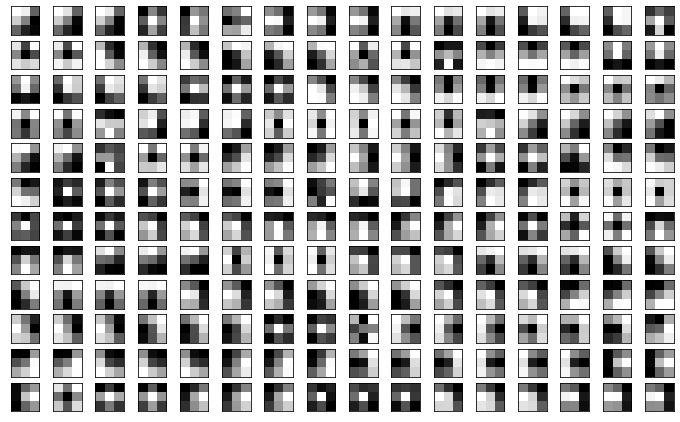

In [109]:
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 64, 0
pyplot.figure(figsize=(12,15))
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(24, 16, ix+1)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
plt.savefig('all_64x3_VGG16_1st_block_filters.png',bbox_inches='tight')

In [107]:
filters.shape

(3, 3, 3, 64)